By The End Of This Session You Should Be Able To:
----

- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners
- Use variables to _D.R.Y. out your code_  (DRY = don't repeat yourself)

Load the `trips` data into a dataframe.  

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
trips = pd.read_csv('data/bike_share_201402_trip_data.csv')
trips.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


How many observations are there?

In [27]:
trips.shape    # 144015

(144015, 11)

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 

<br>

<details><summary>
Click here for a hint…
</summary>
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb#Renaming-Columns
</details>

In [30]:
trips.columns = [c.lower() for c in trips.columns]
trips.columns = [c.replace(' ', '_') for c in trips.columns]
trips.columns = [c.replace('#', 'num') for c in trips.columns]
trips.columns

Index(['trip_id', 'duration', 'start_date', 'start_station', 'start_terminal',
       'end_date', 'end_station', 'end_terminal', 'bike_num',
       'subscription_type', 'zip_code'],
      dtype='object')

In [29]:
# or via rename with 'columns' keyword
trips.rename(columns=lambda x : x.lower(), inplace=True)
trips.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
trips.rename(columns=lambda x : x.replace('#', 'num'), inplace=True)
trips.columns

Index(['trip_id', 'duration', 'start_date', 'start_station', 'start_terminal',
       'end_date', 'end_station', 'end_terminal', 'bike_num',
       'subscription_type', 'zip_code'],
      dtype='object')

In [28]:
# or via rename with 'mapper' and 'axis' keyword
trips.rename(mapper=lambda x : x.lower(), axis=1, inplace=True)
trips.rename(mapper=lambda x : x.replace(' ', '_'), axis=1, inplace=True)
trips.rename(mapper=lambda x : x.replace('#', 'num'), axis=1, inplace=True)
trips.columns

Index(['trip_id', 'duration', 'start_date', 'start_station', 'start_terminal',
       'end_date', 'end_station', 'end_terminal', 'bike_num',
       'subscription_type', 'zip_code'],
      dtype='object')

How many types of subscription options are there?

In [51]:
# answer: 2 (Subscriber, Customer)
trips.subscription_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [52]:
trips.subscription_type.describe()

count         144015
unique             2
top       Subscriber
freq          113647
Name: subscription_type, dtype: object

What is the frequency of each subscription option?

In [54]:
# answer: 113647 Subscribers, 30368 Customers
trips.subscription_type.value_counts()

Subscriber    113647
Customer       30368
Name: subscription_type, dtype: int64

Please plot the frequency of each subscription option with pie chart:

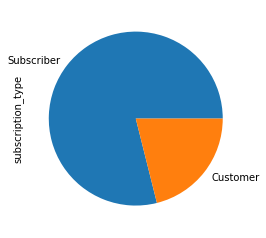

In [57]:
trips.subscription_type.value_counts().plot(kind='pie');

Please plot the frequency of each subscription option with bar chart:

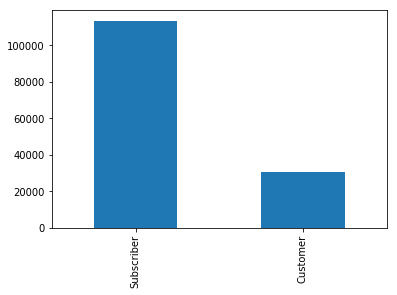

In [58]:
trips.subscription_type.value_counts().plot(kind='bar');

Repeat same analysis for start_station but sorted from high to low.

In [61]:
trips.start_station.unique()
trips.start_station.describe()

count                                       144015
unique                                          69
top       San Francisco Caltrain (Townsend at 4th)
freq                                          9838
Name: start_station, dtype: object

In [62]:
trips.start_station.value_counts()

San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
                                                 ... 
Franklin at Maple                                  99
Broadway at Main                                   45
Redwood City Public Library                        44
San Jose Government Center                         23
Mezes Park                                          3
Name: start_station, Length: 69, dtype: int64

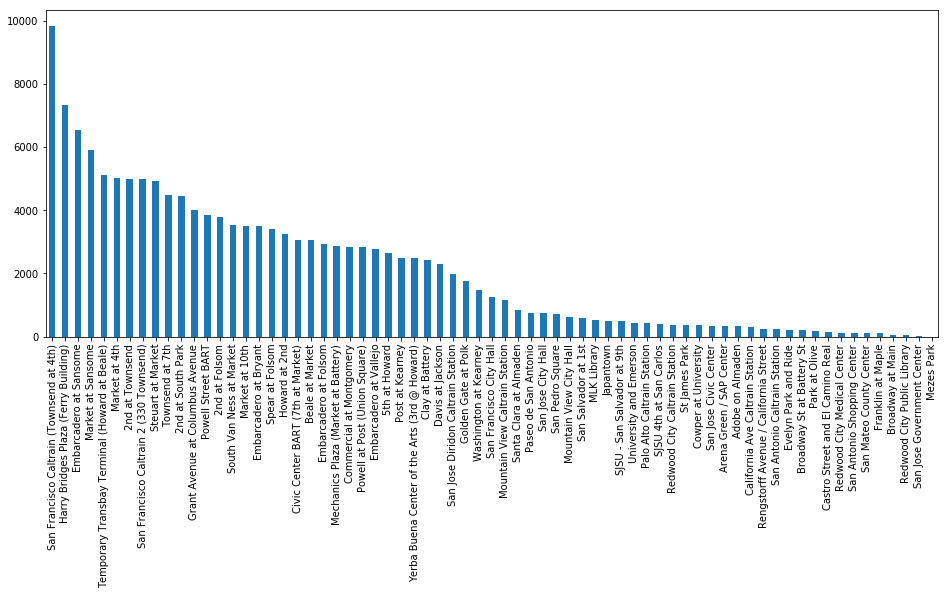

In [69]:
trips.start_station.value_counts().plot(kind='bar', figsize=(16, 6));

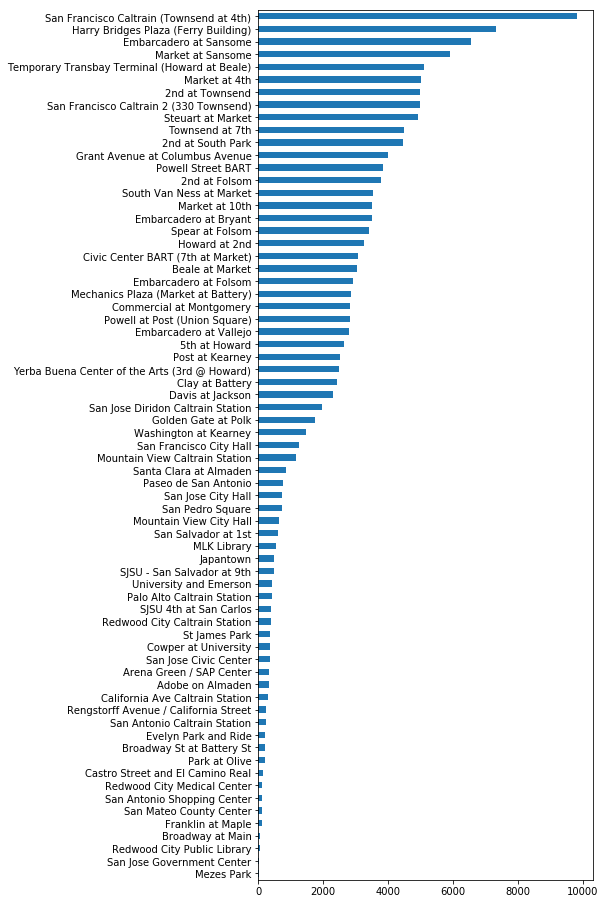

In [71]:
trips.start_station.value_counts(ascending=True).plot(kind='barh', figsize=(6, 16));

Repeat same analysis for end_station but sorted from __low to high__.

In [74]:
trips.end_station.value_counts(ascending=True)

Mezes Park                                      5
San Jose Government Center                     23
Broadway at Main                               56
Franklin at Maple                              93
San Antonio Shopping Center                    93
                                            ...  
2nd at Townsend                              5655
Market at Sansome                            6238
Harry Bridges Plaza (Ferry Building)         7475
Embarcadero at Sansome                       7590
San Francisco Caltrain (Townsend at 4th)    11637
Name: end_station, Length: 69, dtype: int64

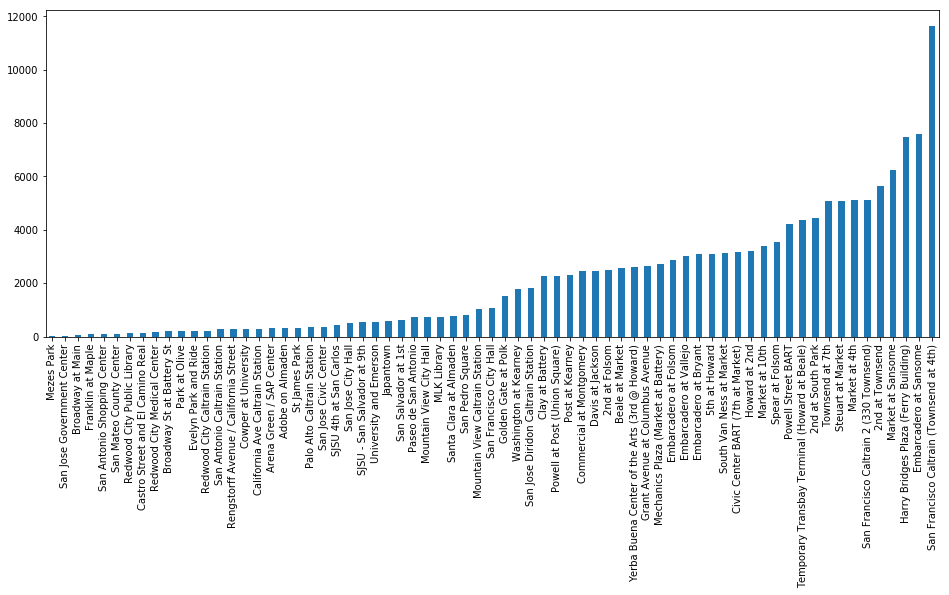

In [76]:
trips.end_station.value_counts(ascending=True).plot(kind='bar', figsize=(16, 6));

Looking at just most popular stations, what are the qualitative similarities and differences between start and end stations?

In [ ]:
# Top 4 start and end stations are the same, they include:
#    San Francisco Caltrain, Embarcadero at Sansome, Harry Bridges Plaza, Market at Sansome

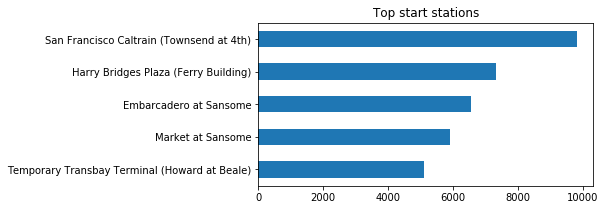

In [91]:
trips.start_station.value_counts(ascending=True).tail().plot(kind = 'barh', figsize=(6,3), 
                                                            title = 'Top start stations');

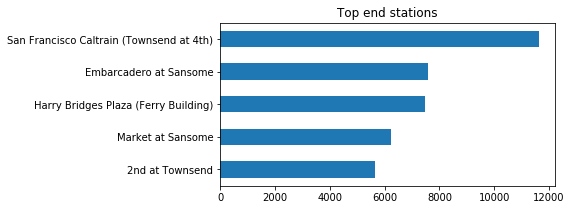

In [90]:
trips.end_station.value_counts(ascending=True).tail().plot(kind = 'barh', figsize=(6,3), 
                                                            title='Top end stations');

Create a table that has start_station segmented by subscription_type.

Include the marginals
<br>
<br>
<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

In [102]:
trips_cross = pd.crosstab(index=trips.start_station, columns=trips.subscription_type, margins=True)
trips_cross

subscription_type,Customer,Subscriber,All
start_station,,,
2nd at Folsom,427,3349,3776
2nd at South Park,535,3923,4458
2nd at Townsend,882,4105,4987
5th at Howard,606,2029,2635
Adobe on Almaden,75,260,335
...,...,...,...
Townsend at 7th,518,3975,4493
University and Emerson,328,106,434
Washington at Kearney,561,911,1472


-----

Let's look at duration....

How long is the shortest trip? How many are that short?  --> 60 seconds, 17x

In [105]:
trips.duration.min()

60

In [134]:
# Option 1a:
trips.duration.eq(other=trips.duration.min(), 
                  axis=0).sum() # Return Equal to of series and other, element-wise (binary operator `eq`).

17

In [135]:
# Option 1b:
sum(trips.duration == trips.duration.min())

17

In [138]:
# Option 1c:
trips[trips.duration == trips.duration.min()].shape[0]

17

In [136]:
# Option 2:
trips.duration.value_counts().sort_index().head(1)

60    17
Name: duration, dtype: int64

In [144]:
# Option 3:
trips.groupby('duration').trip_id.count().head(1)

duration
60    17
Name: trip_id, dtype: int64

What do you think is going on with the shrort trips?

In [182]:
# Probably the minimum duration to hire a bike is 60 seconds (or at least the duration is rounded to minutes)

What is the longest trip? How many trips are "long"?

In [145]:
trips.duration.max()

722236

In [146]:
trips.duration.value_counts().sort_index().tail(1)

722236    1
Name: duration, dtype: int64

In [153]:
trips.sort_values('duration', ascending=False).head(5)

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
80510,111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301
93400,129504,619322,12/18/2013 9:16,San Jose Diridon Caltrain Station,2,12/25/2013 13:18,SJSU 4th at San Carlos,12,653,Subscriber,94041
20535,32121,597517,9/23/2013 18:24,California Ave Caltrain Station,36,9/30/2013 16:23,Palo Alto Caltrain Station,34,168,Customer,95051
119830,166010,586356,1/25/2014 20:00,San Antonio Caltrain Station,29,2/1/2014 14:53,San Antonio Caltrain Station,29,693,Customer,94303
43549,62246,429384,10/17/2013 16:06,Davis at Jackson,42,10/22/2013 15:23,Powell Street BART,39,465,Customer,43113


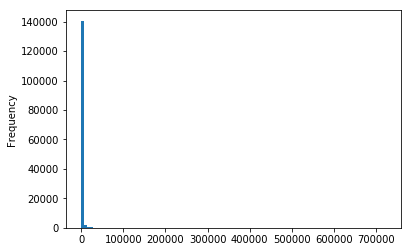

In [152]:
trips.duration.plot(kind='hist', bins=100);

Do the long durations seem reasonable? Why are they so long? What could that tell us about the users?

In [248]:
# 722236 seconds = ca. 200 hours = more than 8 days
# --> maybe they forgot returning the bike or did a longer bike trip for several days

Timebox 15 minutes to explore the data guided by your own intuition or hypotheses…

Be prepared to show something to the rest of class.

In [ ]:
# --> see below (in "Challenge Exercises") for my own data exploration and data visualization

-----
Challenge Exercises
-----

Plot duration

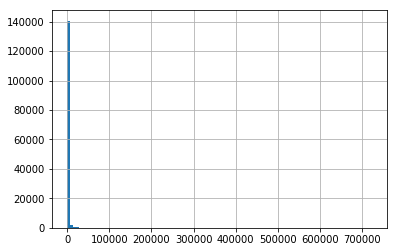

In [158]:
# Include all durations in histogram:
trips.duration.hist(bins=100);
# trips.duration.plot(kind='hist', bins=100);

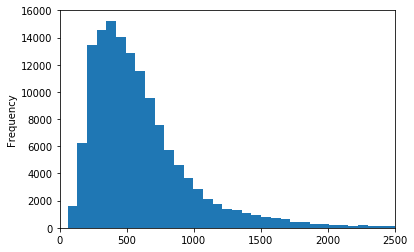

In [172]:
# Option 1: Cut the x-axis at 2500 sec
trips.duration.plot(kind='hist', bins=10000, xlim=(0,2500));

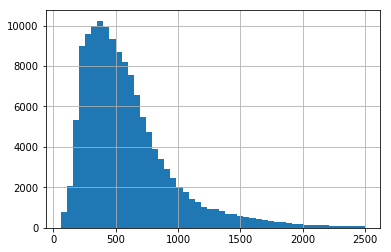

In [175]:
# Option 2: Include only durations < 2500 sec in histogram
trips.duration[trips.duration < 2500].hist(bins=50);

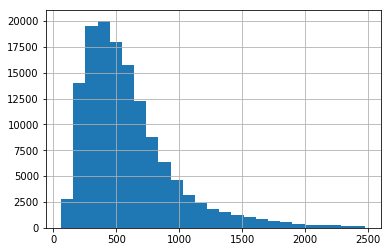

In [176]:
# Option 3: Include only lowest 90% of durations in histogram:
trips.duration[trips.duration < trips.duration.quantile(0.95)].hist(bins=25);

Does that plot give insights?

In [ ]:
# yes, the distribution is heavily skewed to the left, 
# most durations are quite short (<1000sec --> < 20min), probably short rides to work or bus/train stations
# only few durations are very long (>2500sec --> >30min), probably longer bike trips or users forgot to return bike

<br><br><br>Select subsections of the data to make a series of plots to enable insights for the Product Team<br><br>

In [177]:
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [178]:
# transform start_date and end_date to datetime (to better work with it):
trips.start_date = pd.to_datetime(trips.start_date)
trips.end_date = pd.to_datetime(trips.end_date)
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103


In [179]:
# create new series (columns) for start/end month and hour:
start_month = trips.start_date.apply(lambda d: d.month)
start_month.name = 'start_month'
start_hour = trips.start_date.apply(lambda d: d.hour)
start_hour.name = 'start_hour'

end_month = trips.end_date.apply(lambda d: d.month)
end_month.name = 'end_month'
end_hour = trips.end_date.apply(lambda d: d.hour)
end_hour.name = 'end_hour'

In [180]:
# add new columns for start/end month and hour to df:
trips = pd.concat([trips, start_month, start_hour, end_month, end_hour], axis = 1)
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code,start_month,start_hour,end_month,end_hour
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,8,14,8,14
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,8,14,8,14
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,8,10,8,10
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,8,11,8,11
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,8,12,8,12


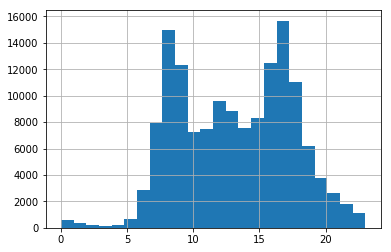

In [181]:
# Check distribution of start_hours throughout the day:
trips.start_hour.hist(bins = 24);

In [ ]:
# Seems that most bikes are used at rush-hour (around 9am and 5pm), or around noon (12am)

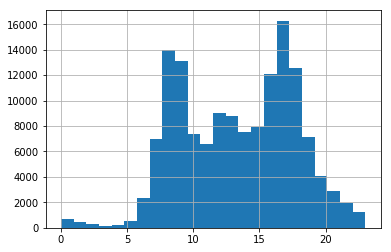

In [182]:
# Check distribution of end_hours throughout the day:
trips.end_hour.hist(bins = 24);

In [ ]:
# Nearly identical to start_hour distribution; makes sense, since most durations are very short (<15 min)

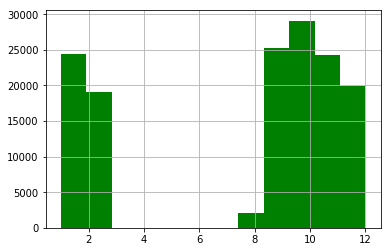

In [183]:
# Check distributions of start_months and end_months:
trips.start_month.hist(bins = 12, color='green');

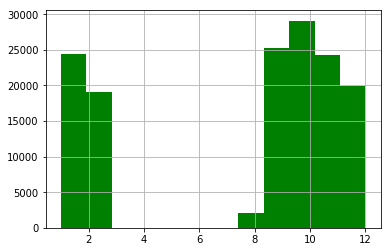

In [184]:
trips.end_month.hist(bins = 12, color='green');

In [185]:
# Seems that there are not data for the summer months in this data set. 
# Let's check this by looking at the earliest and latest start/end date in the data set:

trips.start_date.min(), trips.start_date.max()

(Timestamp('2013-08-29 09:08:00'), Timestamp('2014-02-28 23:20:00'))

In [186]:
trips.end_date.min(), trips.end_date.max()

(Timestamp('2013-08-29 09:11:00'), Timestamp('2014-03-02 16:52:00'))

In [ ]:
# Aha, the data set only includes bike rents between Aug 2013 and March 2014
# Thus, it makes less sense to do statistics with the start/end months or years, 
# since some months are not contained in the data set

In [ ]:
# But let's explore the start hours a bit more (we will stick with the start hours and not
# the end hours, since both start and end hours are nearly the same anyway (due to very short trip durations)

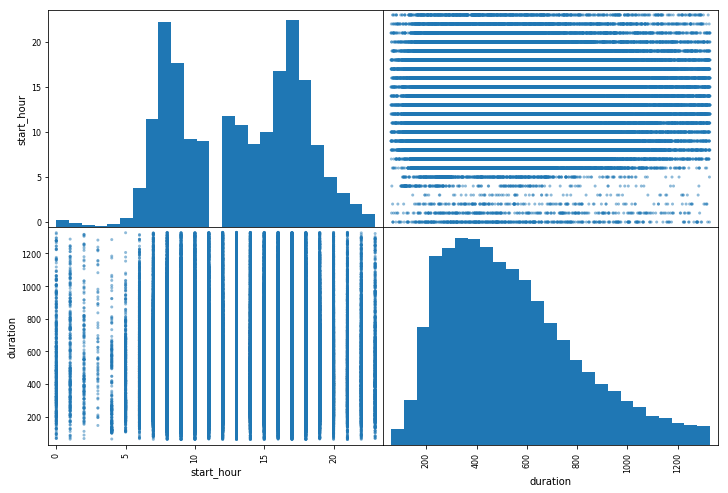

In [190]:
# Let's check how start_hour relates to duration, but we will only take data for durations within the
# 90% quantile (not the extremely long durations at the right tail of the distribution):
from pandas.plotting import scatter_matrix

trips2 = trips[trips.duration < trips.duration.quantile(0.90)]
scatter_matrix(trips2[["start_hour", "duration"]], diagonal='hist', figsize=(12,8), alpha=0.5,
               hist_kwds={'bins': 25});

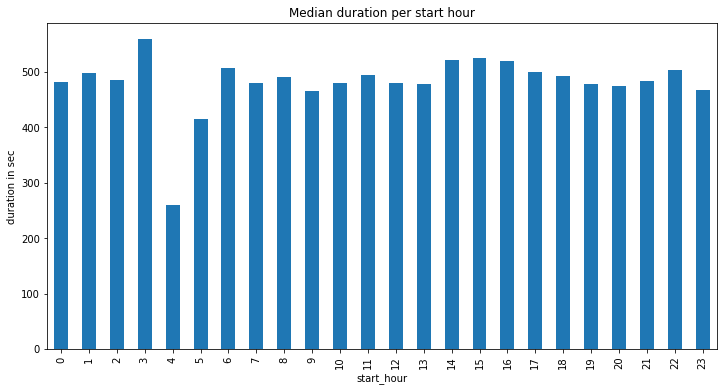

In [193]:
# Let's see the median duration per start hour:
trips2.groupby('start_hour').duration.median().plot(kind='bar',figsize=(12,6));
plt.title('Median duration per start hour')
plt.ylabel('duration in sec');

In [197]:
# Finally, let's check the median duration per start_hour and subscription_type:
trips_pivot = pd.pivot_table(data=trips2, values='duration', index='start_hour', # margins=True, 
                             columns='subscription_type', aggfunc=np.median)
trips_pivot

subscription_type,Customer,Subscriber
start_hour,,
0,709.0,413.0
1,764.0,419.0
2,707.5,424.0
3,668.0,524.0
4,640.0,243.5
5,468.0,402.0
6,531.5,506.0
7,557.0,475.0
8,645.5,485.0


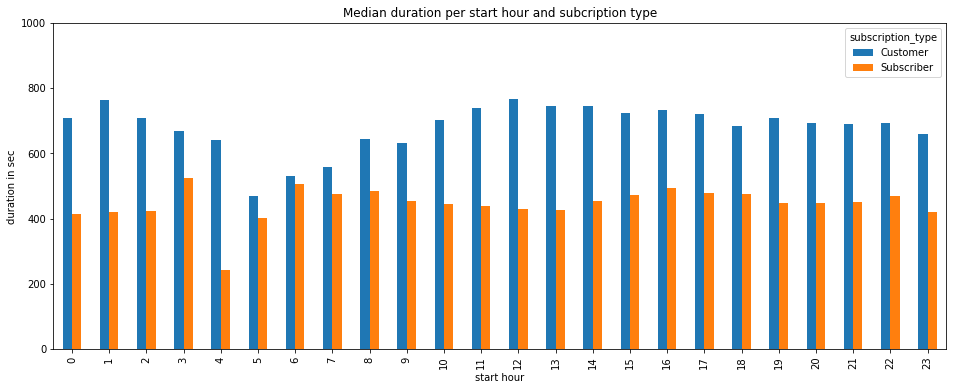

In [198]:
trips_pivot.plot(kind='bar', figsize=(16,6), ylim=(0,1000));  # colormap='winter'
plt.title('Median duration per start hour and subcription type')
plt.xlabel('start hour')
plt.ylabel('duration in sec');

---

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

In [204]:
trips.start_station = trips.start_station.apply(lambda x: x.replace(' ','_').lower())
trips.end_station = trips.end_station.apply(lambda x: x.replace(' ','_').lower())  
trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code,start_month,start_hour,end_month,end_hour
0,4576,63,2013-08-29 14:13:00,south_van_ness_at_market,66,2013-08-29 14:14:00,south_van_ness_at_market,66,520,Subscriber,94127,8,14,8,14
1,4607,70,2013-08-29 14:42:00,san_jose_city_hall,10,2013-08-29 14:43:00,san_jose_city_hall,10,661,Subscriber,95138,8,14,8,14
2,4130,71,2013-08-29 10:16:00,mountain_view_city_hall,27,2013-08-29 10:17:00,mountain_view_city_hall,27,48,Subscriber,97214,8,10,8,10
3,4251,77,2013-08-29 11:29:00,san_jose_city_hall,10,2013-08-29 11:30:00,san_jose_city_hall,10,26,Subscriber,95060,8,11,8,11
4,4299,83,2013-08-29 12:02:00,south_van_ness_at_market,66,2013-08-29 12:04:00,market_at_10th,67,319,Subscriber,94103,8,12,8,12


In [153]:
# or in one line (but not nice here, since there are also other columns of type string that will change):

# trips = trips.applymap(lambda s: s.replace(' ','_').lower() if type(s) == str else s)
# trips.head()

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_num,subscription_type,zip_code
0,4576,63,8/29/2013_14:13,south_van_ness_at_market,66,8/29/2013_14:14,south_van_ness_at_market,66,520,subscriber,94127
1,4607,70,8/29/2013_14:42,san_jose_city_hall,10,8/29/2013_14:43,san_jose_city_hall,10,661,subscriber,95138
2,4130,71,8/29/2013_10:16,mountain_view_city_hall,27,8/29/2013_10:17,mountain_view_city_hall,27,48,subscriber,97214
3,4251,77,8/29/2013_11:29,san_jose_city_hall,10,8/29/2013_11:30,san_jose_city_hall,10,26,subscriber,95060
4,4299,83,8/29/2013_12:02,south_van_ness_at_market,66,8/29/2013_12:04,market_at_10th,67,319,subscriber,94103
